# **Sprint 深層学習スクラッチ ニューラルネットワーク**

## **2. MNISTデータセット**

In [1]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Using TensorFlow backend.


In [2]:
print(X_train.shape)
print(X_test.shape)
print(X_train[0].dtype)
print(X_train[0])

(60000, 28, 28)
(10000, 28, 28)
uint8
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0 

In [3]:
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

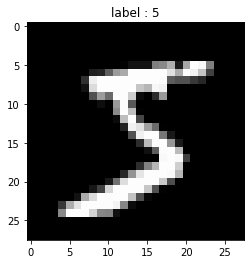

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
index = 0
image = X_train[index].reshape(28,28)
# X_train[index]: (784,)
# image: (28, 28)
plt.imshow(image, 'gray')
plt.title('label : {}'.format(y_train[index]))
plt.show()

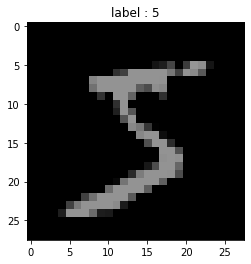

[[-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -1

In [5]:
import numpy as np

index = 0
image = X_train[index].reshape(28,28)
image = image.astype(np.float) # float型に変換
image -= 105.35 # 意図的に負の小数値を作り出してみる
plt.imshow(image, 'gray', vmin=0, vmax=255)
plt.title('label : {}'.format(y_train[index]))
plt.show()
print(image) # 値を確認

**前処理**

In [6]:
X_train = X_train.astype(np.float)
X_test = X_test.astype(np.float)
X_train /= 255
X_test /= 255
print(X_train.max())
print(X_train.min())

1.0
0.0


In [7]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
y_train_one_hot = enc.fit_transform(y_train[:, np.newaxis])
y_test_one_hot = enc.transform(y_test[:, np.newaxis])
print(y_train.shape)
print(y_train_one_hot.shape)
print(y_train_one_hot.dtype)

(60000,)
(60000, 10)
float64


In [8]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train_one_hot, test_size=0.2)
print(X_train.shape)
print(X_val.shape)
print(len(y_train))

(48000, 784)
(12000, 784)
48000


## **3. ニューラルネットワークスクラッチ**

In [9]:
class ScratchSimpleNeuralNetrowkClassifier():
    """
    シンプルな三層ニューラルネットワーク分類器

    Parameters
    ----------

    Attributes
    ----------
    """

    def __init__(self, verbose = True):
        self.verbose = verbose
        pass

    def fit(self, X, y, X_val=None, y_val=None):
        """
        ニューラルネットワーク分類器を学習する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練用データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練用データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証用データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証用データの正解値
        """

        if self.verbose:
            #verboseをTrueにした際は学習過程などを出力する
            print()
        pass

    def predict(self, X):
        """
        ニューラルネットワーク分類器を使い推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            推定結果
        """

        pass
        return

In [10]:
class GetMiniBatch:
    """
    ミニバッチを取得するイテレータ

    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
      訓練用データ
    y : 次の形のndarray, shape (n_samples, 1)
      正解値
    batch_size : int
      バッチサイズ
    seed : int
      NumPyの乱数のシード
    """
    def __init__(self, X, y, batch_size = 20, seed=0):
        self.batch_size = batch_size
        np.random.seed(seed)
        shuffle_index = np.random.permutation(np.arange(X.shape[0]))
        self._X = X[shuffle_index]
        self._y = y[shuffle_index]
        self._stop = np.ceil(X.shape[0]/self.batch_size).astype(np.int)

    def __len__(self):
        return self._stop

    def __getitem__(self,item):
        p0 = item*self.batch_size
        p1 = item*self.batch_size + self.batch_size
        return self._X[p0:p1], self._y[p0:p1]        

    def __iter__(self):
        self._counter = 0
        return self

    def __next__(self):
        if self._counter >= self._stop:
            raise StopIteration()
        p0 = self._counter*self.batch_size
        p1 = self._counter*self.batch_size + self.batch_size
        self._counter += 1
        return self._X[p0:p1], self._y[p0:p1]

In [11]:
get_mini_batch = GetMiniBatch(X_train, y_train, batch_size=20)

print(len(get_mini_batch)) # 2400
print(get_mini_batch[5]) # 5番目のミニバッチが取得できる
for mini_X_train, mini_y_train in get_mini_batch:
    # このfor文内でミニバッチが使える
    pass

2400
(array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0

### **【問題1】重みの初期値を決めるコードの作成**

In [12]:
n_features = 784
n_nodes1 = 400
sigma = 0.01
W1 = sigma * np.random.randn(n_features, n_nodes1)
b1 = np.random.rand(400)
print('W1:', W1.shape)
print('b1:', b1.shape)
n_nodes2 = 200
W2 = sigma * np.random.randn(n_nodes1, n_nodes2)
b2 = np.random.rand(200)
print('W2', W2.shape)
print('b2:', b2.shape)
n_output = 10
W3 = sigma * np.random.randn(n_nodes2, n_output)
b3 = np.random.rand(10)
print('W3:', W3.shape)
print('b3:', b3.shape)

W1: (784, 400)
b1: (400,)
W2 (400, 200)
b2: (200,)
W3: (200, 10)
b3: (10,)


In [13]:
params = {}
params['W1'] = sigma * np.random.randn(n_features, n_nodes1)
params['b1'] = np.random.rand(400)
params['W2'] = sigma * np.random.randn(n_nodes1, n_nodes2)
params['b2'] = np.random.rand(200)
params['W3'] = sigma * np.random.randn(n_nodes2, n_output)
params['b3'] = np.random.rand(10)

In [14]:
params

{'W1': array([[-0.00900359, -0.01698344,  0.01577815, ..., -0.01156267,
         -0.01673465,  0.00758476],
        [-0.00618201,  0.01212179, -0.00106411, ..., -0.01254448,
         -0.01770738, -0.00223043],
        [-0.00654712,  0.00886941, -0.00084888, ..., -0.00081965,
         -0.00926552, -0.00120646],
        ...,
        [-0.01642478,  0.01190158,  0.01055693, ...,  0.00958934,
          0.00470071, -0.00631738],
        [-0.01069113, -0.00465046,  0.00118049, ...,  0.00243923,
         -0.00063011, -0.00531278],
        [-0.00851809,  0.01189183,  0.00399869, ...,  0.00321873,
         -0.00551489,  0.00675309]]),
 'b1': array([0.80670469, 0.37606445, 0.96980889, 0.08965196, 0.32706812,
        0.22834845, 0.01010139, 0.90764538, 0.92973047, 0.74621593,
        0.5723325 , 0.92582866, 0.94928094, 0.13147006, 0.5146992 ,
        0.73143411, 0.2484141 , 0.77806545, 0.28751105, 0.04273808,
        0.00671549, 0.91370561, 0.4830459 , 0.91599033, 0.14165461,
        0.15788574, 0

### **【問題2】フォワードプロパゲーションの実装**

In [15]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def softmax(x):
    C = x.max()
    return np.exp(x - C) / np.exp(x - C).sum()

def forward(X):
    a1 = np.dot(X, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    z3 = softmax(a3)
    return z3

### **【問題3】交差エントロピー誤差の実装**

In [16]:
batch_size = 5
t = np.array([2, 7, 0, 9, 4])
y = np.array([0.1, 0.6, 0.1, 0.05, 0.15])
print(y[np.arange(batch_size)])
print(y.size)
a = np.array([[1, 2, 3], [4, 5, 6]])
print(a[1, 1])

[0.1  0.6  0.1  0.05 0.15]
5
5


In [17]:
def cross_entropy_error(y, t):
    if y.dim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

### **【問題4】バックプロパゲーションの実装**

In [18]:
target_vector = np.array([0, 2, 1, 3, 2])
n_labels = len(np.unique(target_vector))
np.eye(n_labels)[target_vector]

array([[1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.]])

In [19]:
def _forward(X):
        a1 = np.dot(X, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        z2 = sigmoid(a2)
        a3 = np.dot(z2, W3) + b3
        z3 = softmax(a3)
        return z3

In [20]:
la = _forward(X_train)
print(la.shape)
print(X_train.shape)

(48000, 10)
(48000, 784)


In [21]:
def _cross_entropy_error(y, t):
    batch_size = y.shape[0]
    loss = -np.sum(t * np.log(y)) / batch_size
    return loss

In [22]:
print(_cross_entropy_error(la, y_train))
# print(y_train_one_hot.shape)

13.104694925524985


In [23]:
get_mini_batch = GetMiniBatch(X_train, y_train, batch_size=20)

print(len(get_mini_batch)) # 2400
#print(get_mini_batch[5]) # 5番目のミニバッチが取得できる

2400


In [24]:
class ScratchSimpleNeuralNetrowkClassifier():

    def __init__(self, n_input, n_nodes1, n_nodes2, n_output, verbose = True):
        self.verbose = verbose
        # 重みの初期化
        params = {}
        params['W1'] = sigma * np.random.randn(n_features, n_nodes1)
        params['b1'] = np.random.rand(400)
        params['W2'] = sigma * np.random.randn(n_nodes1, n_nodes2)
        params['b2'] = np.random.rand(200)
        params['W3'] = sigma * np.random.randn(n_nodes2, n_output)
        params['b3'] = np.random.rand(10)
        
    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
        
    def _softmax(self, x):
        C = x.max()
        return np.exp(x - C) / np.exp(x - C).sum()
        
    def _forward(self, X):
        a1 = np.dot(X, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        z2 = sigmoid(a2)
        a3 = np.dot(z2, W3) + b3
        z3 = softmax(a3)
        return z3
    
    def _cross_entropy_error(self, y, t):  
        batch_size = y.shape[0]
        loss = -np.sum(t * np.log(y)) / batch_size
        return loss
        

    def fit(self, X, y, X_val=None, y_val=None):

        if self.verbose:
            #verboseをTrueにした際は学習過程などを出力する
            print()
        pass

    def predict(self, X):
        """
        ニューラルネットワーク分類器を使い推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            推定結果
        """

        pass
        return

### **【問題4】バックプロパゲーションの実装**

In [33]:
class ScratchSimpleNeuralNetrowkClassifier():
    # TODO: epoch複数に対応
    def __init__(self, n_input, n_nodes1, n_nodes2, n_output, lr, epoch, verbose=True):
        self.verbose = verbose
        self.n_input = n_input
        self.n_nodes1 = n_nodes1
        self.n_nodes2 = n_nodes2
        self.n_output = n_output
        self.sigma = 0.01
        self.lr = lr
        self.epoch = epoch
        
        # 重み、バイアスの初期化
        np.random.seed(0)
        self.W1 = self.sigma * np.random.randn(n_input, n_nodes1)
        self.b1 = np.random.randn(n_nodes1)
        self.W2 = self.sigma * np.random.randn(n_nodes1, n_nodes2)
        self.b2 = np.random.randn(n_nodes2)
        self.W3 = self.sigma * np.random.randn(n_nodes2, n_output)
        self.b3 = np.random.randn(n_output)

    def fit(self, X, y, X_val=None, y_val=None):
        self.loss_list = []
        for _ in range(self.epoch):
            get_mini_batch = GetMiniBatch(X, y, batch_size=20)
            #self.loss_list = []
            self.loss_sum = 0
            # TODO: epochごとにlossを記録
            # mini_batchごとの平均
            for mini_X_train, mini_y_train in get_mini_batch:
                a1, z1, a2, z2, a3, z3 = self._forward(mini_X_train)
                self.loss = self._cross_entropy_error(z3, mini_y_train)
                #self.loss_list.append(self.loss)
                #self.loss_sum += self.loss
                #self.loss_mean = self.loss_sum / batch_size
                self.W1, self.b1, self.W2, self.b2, self.W3, self.b3 = self._backward(mini_X_train, z1, z2, z3, mini_y_train)
            # print(self.W3.sum(axis=0))
            self.loss_list.append(self.loss)
            
            
            

#         if self.verbose:
#             #verboseをTrueにした際は学習過程などを出力する
#             return loss_list
#         pass

    def predict(self, X):
        _, _, _, _, _, y = self._forward(X)
        pred = np.argmax(y, axis=1)
        return pred, y
    
    def _sigmoid(self, x):
        C = np.max(x)
        return 1 / (1 + np.exp(-x/C))
    
    def _d_sigmoid(self, x):
        return self._sigmoid(x) * (1 - self._sigmoid(x))
    
    def _softmax(self, x):
        # 出力の総和が1でない
        C = np.max(x)
        return np.exp(x / C) / np.exp(x / C).sum(axis=1)[:, np.newaxis]
    
    def _cross_entropy_error(self, y, t):
        size = 1
        if y.ndim == 2:
            size = y.shape[0]
        return -np.sum(t * np.log(y)) / size
    
    def _forward(self, X):
        a1 = np.dot(X, self.W1) + self.b1
        z1 = self._sigmoid(a1)
        a2 = np.dot(z1, self.W2) + self.b2
        z2 = self._sigmoid(a2)
        a3 = np.dot(z2, self.W3) + self.b3
        z3 = self._softmax(a3)
        return a1, z1, a2, z2, a3, z3
    
    def _backward(self, X, z1, z2, z3, t):
        # z3 : (20, 10)
        #print('z3 shape:', z3.shape)
        # t : (20, 10)
        #print('t shape', t.shape)
        delta3 = z3 - t # delta3: 
        #print('delta3 shape', delta3.shape)
        grad_b3 = np.sum(delta3, axis=0)
        #print('grad_b3:', grad_b3.shape)
        grad_W3 = np.dot(z2.T, delta3)
        #print('grad_W3.shape:', grad_W3.shape)
        
        delta2 = np.dot(delta3, self.W3.T) * self._d_sigmoid(z2)
        grad_b2 = np.sum(delta2, axis=0)
        grad_W2 = np.dot(z1.T, delta2)
        
        delta1 = np.dot(delta2, self.W2.T) * self._d_sigmoid(z1)
        grad_b1 = np.sum(delta1, axis=0)
        grad_W1 = np.dot(X.T, delta1)
        
        self.W1 -= self.lr * grad_W1
        self.b1 -= self.lr * grad_b1
        self.W2 -= self.lr * grad_W2
        self.b2 -= self.lr * grad_b2
        self.W3 -= self.lr * grad_W3
        self.b3 -= self.lr * grad_b3
        
        return self.W1, self.b1, self.W2, self.b2, self.W3, self.b3

In [34]:
nn = ScratchSimpleNeuralNetrowkClassifier(n_input=784, n_nodes1=400, n_nodes2=200, n_output=10, lr=0.000001, epoch=20)
nn.fit(X_train, y_train_one_hot)

In [35]:
a, b = nn.predict(X_val)
print(b[0], a)
for i in range(10):
    print(i, len(a[a==i]))

[0.09877146 0.11424612 0.09917093 0.1014194  0.09607823 0.09007072
 0.09918131 0.10416109 0.09700381 0.09989693] [1 1 1 ... 1 1 1]
0 0
1 12000
2 0
3 0
4 0
5 0
6 0
7 0
8 0
9 0


In [36]:
# nn = ScratchSimpleNeuralNetrowkClassifier(n_input=784, n_nodes1=400, n_nodes2=200, n_output=10, lr=0.000000001, epoch=100)
# nn.fit(X_train, y_train_one_hot)

In [ ]:
a, b = nn.predict(X_val)
print(b[0], a)

In [ ]:
nn = ScratchSimpleNeuralNetrowkClassifier(n_input=784, n_nodes1=400, n_nodes2=200, n_output=10, lr=0.1, epoch=100)
nn.fit(X_train, y_train_one_hot)

In [ ]:
a, b = nn.predict(X_val)
print(b[0], a)
print(len(a))
print(np.mean(a))
print(12006/12000)
for i in range(10):
    print(len(a[a==i]))

In [ ]:
b[0]

In [ ]:
# x:(20, 10)
np.ones((5, 3)).sum(axis=1).shape

In [ ]:
nn.W3[:, 1].sum()

In [ ]:
nn.W3.sum(axis=0)

In [ ]:
# nn.W3.sum(axis=1)

In [31]:
print(nn.loss_list)

[2.755078400519433, 2.778787237064127, 2.798488350724543, 2.80385251592768, 2.7735111023943837, 2.6773449509614506, 2.517454327517451, 2.3758702259022875, 2.318365616262546, 2.3044643930219744, 2.301179579545493, 2.300408836129182, 2.3002282093338864, 2.3001858575818224, 2.3001759135379958, 2.3001735706793034, 2.30017301227085, 2.3001728731732043, 2.300172832700043, 2.3001728154466705]


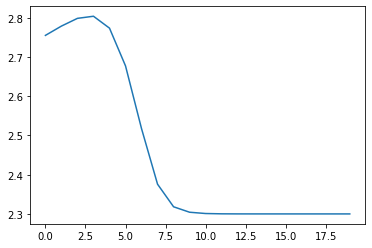

In [32]:
plt.plot(nn.loss_list)
plt.show();